<a href="https://colab.research.google.com/github/mukulre/Projects/blob/main/LightGBM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.style as style
from matplotlib import pyplot
from matplotlib.ticker import ScalarFormatter

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import lightgbm as lgb
from lightgbm import LGBMClassifier

import random

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

train_data = pd.read_csv("train.csv.zip")
test_data = pd.read_csv("test.csv.zip")

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
train_data.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [ ]:
train_data = pd.get_dummies(train_data, columns=["color"], prefix=["color"])
map_type = {"Ghoul":1, "Goblin":2, "Ghost":0} # change ghoul, goblin, ghost to 1, 2 and 0
train_data.loc[:, "type"] = train_data.type.map(map_type)

train_data = train_data.set_index('id')

In [ ]:
X = train_data.drop(["type"],axis=1)
y = train_data.type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_classification

# Generate Sample Data (Replace with your actual dataset)
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Hyperparameter Grid
param_grid = {
    'class_weight': [None, 'balanced'],
    'boosting_type': ['gbdt', 'goss', 'dart'],
    'num_leaves': [30, 50, 100],  # Reduced for efficiency
    'learning_rate': [0.01, 0.1, 0.5],
    'subsample_for_bin': [20000, 50000, 100000],
    'min_child_samples': [20, 50, 100],
    'colsample_bytree': [0.6, 0.8, 1.0],
    "max_depth": [5, 10, 50]
}

# Initialize the LGBM Classifier
lgbm = LGBMClassifier(random_state=42)

# Use GridSearchCV for Hyperparameter Tuning
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid,
                           cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the Model
grid_search.fit(X_train, y_train)

# Best Hyperparameters & Score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 3 folds for each of 4374 candidates, totalling 13122 fits
[LightGBM] [Info] Number of positive: 388, number of negative: 412
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
lgbm_tuned = LGBMClassifier(boosting_type = 'gbdt',
                            class_weight = None,
                            min_child_samples = 20,
                            num_leaves = 30,
                            subsample_for_bin = 20000,
                            learning_rate=0.01,
                            max_depth=10,
                            n_estimators=40,
                            colsample_bytree=0.6) # LightGBM Classifier with optimum paramteres
lgbm_tuned.fit(X_train, y_train)

y_test_pred = lgbm_tuned.predict(X_test) #Predicting X_test to find the solutiın
score = round(accuracy_score(y_test, y_test_pred), 3) # Find the accuracy of y_test and predicitons, and round the result
print(score)

[LightGBM] [Info] Number of positive: 388, number of negative: 412
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.485000 -> initscore=-0.060018
[LightGBM] [Info] Start training from score -0.060018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
0.875


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Axes: xlabel='importance', ylabel='features'>

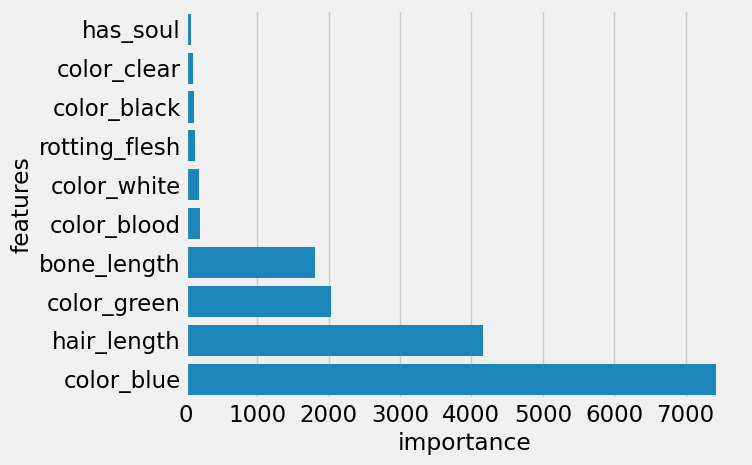

In [10]:
sns.set_context("talk")
style.use('fivethirtyeight')

fi = pd.DataFrame()
# Instead of X.columns, use the feature names from the original DataFrame (train_data)
fi['features'] = train_data.drop(["type"],axis=1).columns.values.tolist()
fi['importance'] = lgbm_tuned.booster_.feature_importance(importance_type='gain')

sns.barplot(x='importance', y='features', data=fi.sort_values(by='importance', ascending=True))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 308
[LightGBM] [Info] Number of data points in the train set: 222, number of used features: 8
[LightGBM] [Info] Start training from score -1.168571
[LightGBM] [Info] Start training from score -1.045969
[LightGBM] [Info] Start training from score -1.085189
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

<Axes: xlabel='importance', ylabel='features'>

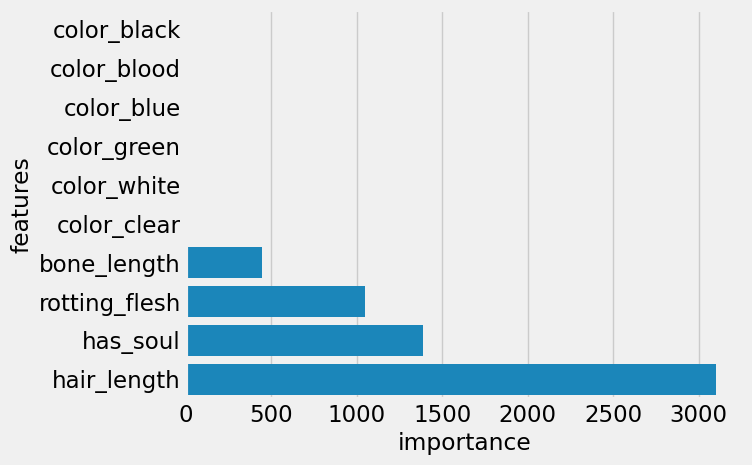

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.style as style
from matplotlib import pyplot
from matplotlib.ticker import ScalarFormatter

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import lightgbm as lgb
from lightgbm import LGBMClassifier

import random

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

train_data = pd.read_csv("train.csv.zip")
test_data = pd.read_csv("test.csv.zip")

train_data.head()

train_data = pd.get_dummies(train_data, columns=["color"], prefix=["color"])
map_type = {"Ghoul":1, "Goblin":2, "Ghost":0} # change ghoul, goblin, ghost to 1, 2 and 0
train_data.loc[:, "type"] = train_data.type.map(map_type)

train_data = train_data.set_index('id')

X = train_data.drop(["type"],axis=1)
y = train_data.type

# Ensure y is of integer type
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

param_grid = {
    'class_weight': [None, 'balanced'],
    'boosting_type': ['gbdt', 'goss', 'dart'],
    'num_leaves': list(range(30, 150)),
    'learning_rate': [0.01,0.1,0.5],
    'subsample_for_bin': [20000,50000,100000,120000,150000],
    'min_child_samples': [20,50,100,200,500],
    'colsample_bytree': [0.6,0.8,1],
    "max_depth": [5,10,50,100]
}

lgbm = LGBMClassifier() # Shortname the LGBMClassifier()
lgbm.fit(X_train, y_train) # Train the lgbm on train sets

lgbm_tuned = LGBMClassifier(boosting_type = 'gbdt',
                            class_weight = None,
                            min_child_samples = 20,
                            num_leaves = 30,
                            subsample_for_bin = 20000,
                            learning_rate=0.01,
                            max_depth=10,
                            n_estimators=40,
                            colsample_bytree=0.6) # LightGBM Classifier with optimum paramteres
lgbm_tuned.fit(X_train, y_train)

y_test_pred = lgbm_tuned.predict(X_test) #Predicting X_test to find the solutiın
score = round(accuracy_score(y_test, y_test_pred), 3) # Find the accuracy of y_test and predicitons, and round the result
print(score)


sns.set_context("talk")
style.use('fivethirtyeight')

fi = pd.DataFrame()
fi['features'] = X.columns.values.tolist()
fi['importance'] = lgbm_tuned.booster_.feature_importance(importance_type='gain')

sns.barplot(x='importance', y='features', data=fi.sort_values(by='importance', ascending=True))